In [8]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
import plotly.graph_objs as go 
import plotly.offline as pyo

#masking
from PIL import Image


from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline 


from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter("ignore")

df=pd.read_csv('vax_tweets_sentiment.csv')

In [2]:
df.sort_values(by='date')

,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment,orig_text
20627,~~Socrates,2010-04-29 09:51:17,80,241,6405,False,2021-03-03,Interim clinical efficacy is 81% for 's \n\nS...,"['BharatBiotech', 'Covaxin']",Twitter for Android,0,0,False,positive,Interim clinical efficacy is 81% for #BharatBi...,NaN,NaN,NaN,NaN
294,294,1337884374927368201,Nacindex,NaN,Tweet and RT all things #OpenFinance #bitcoin ...,2019-03-16 15:14:32,331,431,1132,False,2020-12-12,\nUS agency authorizes Pfizer-BioNTech COVID-1...,NaN,Twitter Web App,1,0.0,False,neutral,https://t.co/Z3j0NbDUbq\nUS agency authorizes ...
34,34,1337742528108519424,Rajat Kotra,"London, England","Ever-curious polymath,#global leader#startups#...",2009-12-03 12:03:28,754,917,220,False,2020-12-12,Vaccine!! Anyone??,"['covid', 'Pfizervaccine', 'PfizerBioNTech']",Twitter for Android,0,0.0,False,neutral,Vaccine!! Anyone?? #covid #Pfizervaccine #Pfiz...
35,35,1337739607857917954,Shahjhan Malik | #WearAMask,"Nottinghamshire, England",Solicitor.Dual Qualified.Single Parent Of 2 Am...,2017-06-22 06:22:55,41708,2868,47862,False,2020-12-12,An immigrant Muslim couple find the COVID-19 V...,"['CovidVaccine', 'PfizerBioNTech', 'Pfizervacc...",Twitter for iPhone,2,37.0,False,neutral,An immigrant Muslim couple find the COVID-19 V...
36,36,1337735595704115200,John Berry,NaN,English (not British or European) beer swillin...,2020-10-13 15:21:27,2,0,0,False,2020-12-12,The finally issues now comes the problem tra...,"['FDA', 'EUA', 'PfizerBioNTech']",Twitter Web App,0,0.0,False,negative,The #FDA finally issues #EUA now comes the pro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,20626,1367112626086453249,Lalatendu Mishra,India,^^The only true wisdom is in knowing you know ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27713,doses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27714,reached 65 nations and recently,"['India', 'coronavirus', 'vaccines', 'COVAXIN']",Twitter for Android,5,4,False,neutral,#India becomes the global hub of #coronavirus ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27715,doses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Sentiment analysis

In [3]:
counts=df['sentiment'].value_counts()
counts

neutral     25843
positive     8698
negative     5628
Name: sentiment, dtype: int64

In [4]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)
    labels=['Neutral','Positive','Negative']

    #fig = px.pie(values=counts,labels=labels )
    
    
    fig = go.Figure(data=[go.Pie(labels=labels, values=counts, textinfo='label+percent')])
    fig.update_layout(title_text=title)
    fig.show()

In [5]:
# used  AWD_LSTM model from fast ai and used transfer learning

plot_sentiment(df, 'sentiment', 'Sentiment Breakdown of all Tweets')

## Top Retweeted Negative Tweets

In [6]:
final_df=df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','orig_text','is_retweet','Unnamed: 0'])
final_df_top_negative=final_df.loc[final_df['sentiment'] == 'negative']
#final_df_top_negative.loc[final_df['retweets'] > 100]
#number=pd.to_numeric(final_df_top_negative["retweets"])
#final_df_top_negative["retweets"] = df["retweets"].apply(pd.to_numeric)
final_df_top_negative['retweets'] = final_df_top_negative['retweets'].astype(str)
final_df_top_negative['retweets'] = final_df_top_negative['retweets'].map(lambda x: x.rstrip('aAbBcC'))
final_df_top_negative['retweets'] = final_df_top_negative['retweets'].astype(int)
final_df_top_negative.sort_values(by="retweets", ascending=False)

,id,user_name,user_location,date,text,hashtags,retweets,favorites,sentiment
20536,1367129491705847809,Manoj Rawat,New Delhi,2021-03-03,It is tough when have to play the sauve Amrika...,['Covaxin'],922,3636.0,negative
21528,1367730478141206530,Minhaz Merchant,Mumbai,2021-03-05,The Opposition campaign to denigrate is disgr...,['Covaxin'],806,2311.0,negative
30805,1372004340563468288,Nagarjuna Akkineni,hyderabad,2021-03-17,Got my jab yesterday .. absolutely no down ti...,['covaxin'],728,8470.0,negative
3440,1350535798366547969,The Epoch Times,"New York, USA",2021-01-16,55 people in the US have died after receiving ...,"['Vaccine', 'COVID19']",678,654.0,negative
7762,1360154347347136512,TS Singh Deo,"Ambikapur, Chhattisgarh, India",2021-02-12,"Sir, the inhibitions and concerns regarding a...",['COVAXIN'],526,1600.0,negative
...,...,...,...,...,...,...,...,...,...
16497,1365817619425673224,Gazman,"Liverpool, England",2021-02-28,The Oxford AZ vaccine has come in for signifi...,NaN,0,1.0,negative
16498,1365817366756605952,Gazman,"Liverpool, England",2021-02-28,The Oxford AZ vaccine has come in for signifi...,NaN,0,0.0,negative
16510,1365708500291227650,Lianne Crawley,Oxfordshire,2021-02-27,Had my covid-19 jab today so far only a sore ...,"['Day1', 'COVID19Vaccine', 'oxfordastrazeneca']",0,0.0,negative
16513,1365685010527887363,Ken Bromfield,London,2021-02-27,having rejected the jab because it smells l...,"['Germany', 'oxfordastrazeneca']",0,0.0,negative


In [7]:

final_df[['text','orig_text']].head(20)

KeyError: "['orig_text'] not in index"

## WordCloud 

In [13]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [140]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np

def show_wordcloud(data, title=''):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U","vaccine",'COVID19',"got","will",'covid','vacccines','dose'])

    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="white").generate(text)

    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

'from os import path\nfrom PIL import Image\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nfrom wordcloud import WordCloud, STOPWORDS\n\ntext = df.loc[df[\'sentiment\']==\'positive\', \'text\']\ntext = " ".join(t for t in text.dropna())\n\nalice_mask = np.array(Image.open(path.join(d, "positive.jpg")))\n\nstopwords = set(STOPWORDS)\nstopwords.add("said")\n\nwc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,\n               stopwords=stopwords)\n\nwc.generate(text)\n\nwc.to_file(path.join(d, "positive.jpg"))\n\nplt.imshow(wc, interpolation=\'bilinear\')\nplt.axis("off")\nplt.figure()'

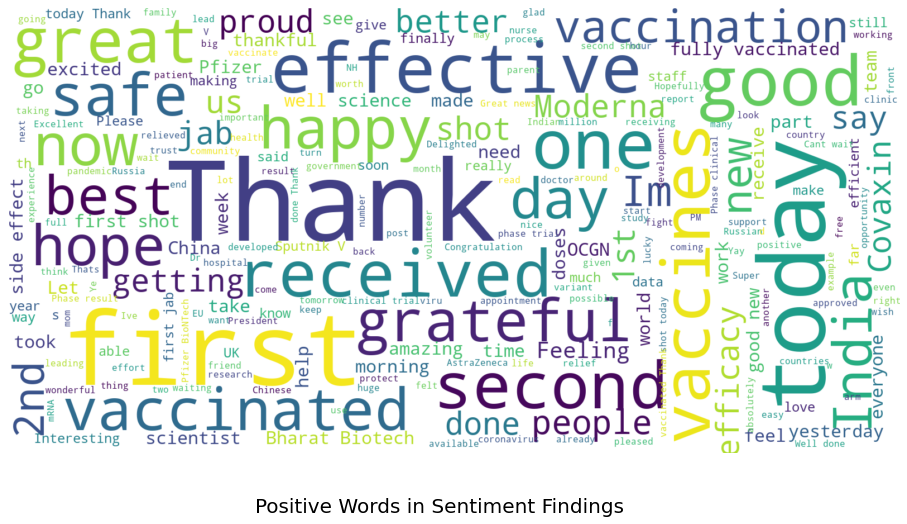

In [141]:
show_wordcloud(df.loc[df['sentiment']=='positive', 'text'], title = 'Positive Words in Sentiment Findings')

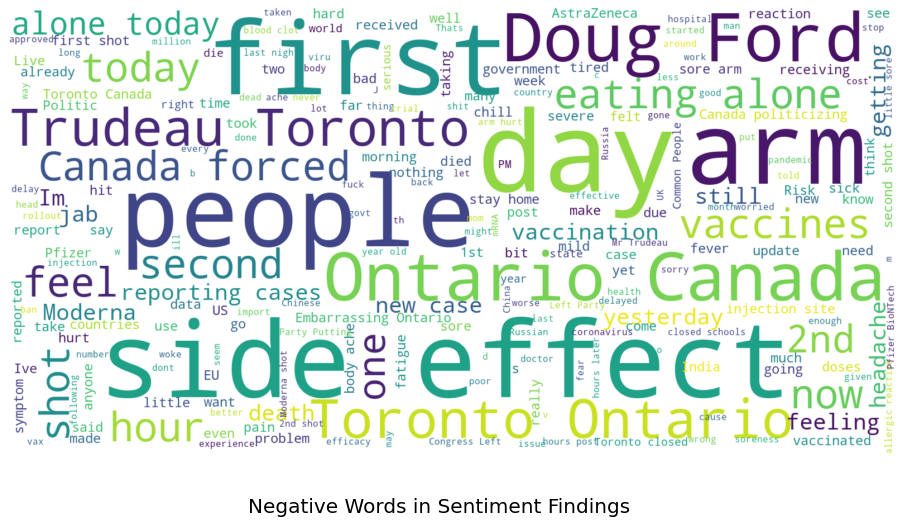

In [142]:
show_wordcloud(df.loc[df['sentiment']=='negative', 'text'], title = 'Negative Words in Sentiment Findings')

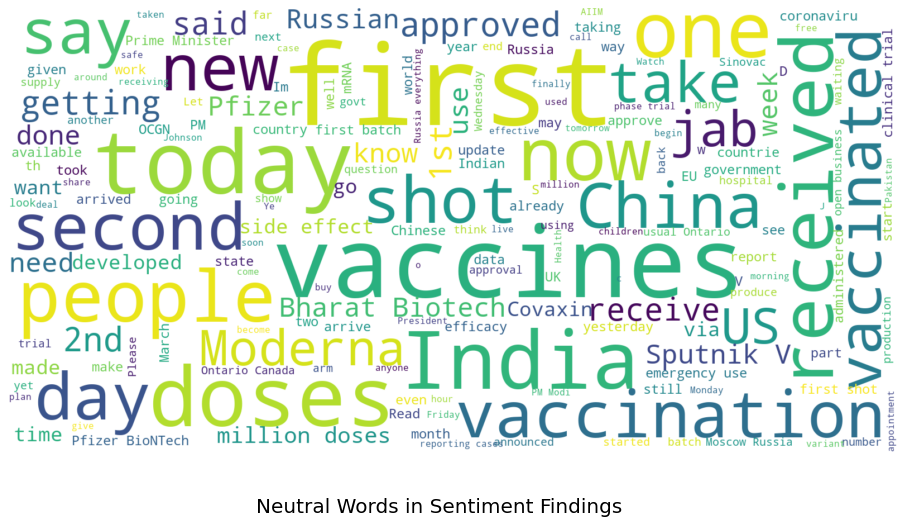

In [143]:
show_wordcloud(df.loc[df['sentiment']=='neutral', 'text'], title = 'Neutral Words in Sentiment Findings')

<Figure size 432x288 with 0 Axes>

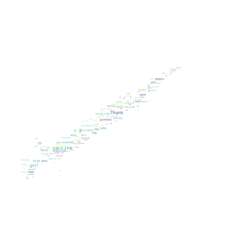

<Figure size 432x288 with 0 Axes>

In [145]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = df.loc[df['sentiment']=='positive', 'text']
text = " ".join(t for t in text.dropna())

mask = np.array(Image.open(path.join(d, "positive.jpg")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=mask,
               stopwords=stopwords)
wc.generate(text)
wc.to_file(path.join(d, "positive.jpg"))

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()

<Figure size 432x288 with 0 Axes>

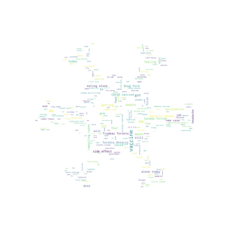

<Figure size 432x288 with 0 Axes>

In [153]:
text = df.loc[df['sentiment']=='negative', 'text']
text = " ".join(t for t in text.dropna())

mask = np.array(Image.open(path.join(d, "negative.jpg")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=mask,
               stopwords=stopwords)
wc.generate(text)
wc.to_file(path.join(d, "negative.jpg"))

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()

## Covaxin Plot 

In [18]:


all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine - not very helpful!
def filtered_timeline(df, vax, title):
    df = df.dropna()
    df_filt = pd.DataFrame()
    for o in vax:
        df_filt = df_filt.append(df[df['orig_text'].str.lower().str.contains(o)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['orig_text'].str.lower().str.contains(o)]
    df_filt = df_filt.drop_duplicates()
    
    return df_filt

covaxin = filtered_timeline(df, ['covaxin'], title='Covaxin')


covaxin_df = covaxin.groupby(['sentiment']).count()
covaxin_df=covaxin_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])
covaxin_df


import plotly.express as px

fig = px.bar(covaxin_df, x='Unnamed: 0')
fig.show()




## Sinopharm Plot 

In [19]:

sinopharm = filtered_timeline(df, ['sinopharm'], title='sinopharm')


sinopharm_df = sinopharm.groupby(['sentiment']).count()
sinopharm_df=sinopharm_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])



import plotly.express as px

fig = px.bar(sinopharm_df, x='Unnamed: 0')
fig.show()




## Sinovac 

In [20]:

sinovac = filtered_timeline(df, ['sinovac'], title='sinovac')


sinovac_df = sinovac.groupby(['sentiment']).count()
sinovac_df=sinovac_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])



import plotly.express as px

fig = px.bar(sinovac_df, x='Unnamed: 0')
fig.show()




## Moderna

In [21]:

moderna = filtered_timeline(df, ['moderna'], title='moderna')


moderna_df = moderna.groupby(['sentiment']).count()
moderna_df=moderna_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])



import plotly.express as px

fig = px.bar(moderna_df, x='Unnamed: 0')
fig.show()


## Pfizer/BioNTech

In [22]:

pfizer = filtered_timeline(df, ['pfizer', 'biontech'], title='pfizer')


pfizer_df = pfizer.groupby(['sentiment']).count()
pfizer_df=pfizer_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])



import plotly.express as px

fig = px.bar(pfizer_df, x='Unnamed: 0')
fig.show()


## Oxford Astrazeneca

In [23]:

astrazenica = filtered_timeline(df, ['oxford', 'astrazeneca','astrazenica'], title='astrazenica')


astrazenica_df = astrazenica.groupby(['sentiment']).count()
astrazenica_df=astrazenica_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])



import plotly.express as px

fig = px.bar(astrazenica_df, x='Unnamed: 0')
fig.show()


## Sputnik V

In [24]:

sputnik = filtered_timeline(df, ['sputnik'], title='sputnik')


sputnik_df = sputnik.groupby(['sentiment']).count()
sputnik_df=sputnik_df.drop(columns=['user_description','user_created','user_followers','user_friends','user_favourites','user_verified','source','user_name','id','user_location','date','text','hashtags','retweets','favorites','is_retweet','orig_text'])



import plotly.express as px

fig = px.bar(sputnik_df, x='Unnamed: 0')
fig.show()


In [25]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

covaxin_df=covaxin_df.rename(columns={"Unnamed: 0":'Covaxin'})
sinopharm_df=sinopharm_df.rename(columns={"Unnamed: 0":'Sinopharm'})
sinovac_df=sinovac_df.rename(columns={"Unnamed: 0":'Sinovac'})
pfizer_df=pfizer_df.rename(columns={"Unnamed: 0":'Pfizer / BioNTech'})
astrazenica_df=astrazenica_df.rename(columns={"Unnamed: 0":'Oxford Astrazeneca'})
moderna_df=moderna_df.rename(columns={"Unnamed: 0":'Moderna'})
sputnik_df=sputnik_df.rename(columns={"Unnamed: 0":'Sputnik V'})

## Combined Dataframes per Vaccine 

In [26]:


result=covaxin_df.join(sinopharm_df,how='outer')
result=result.join(sinovac_df,how='outer')
result=result.join(pfizer_df,how='outer')
result=result.join(astrazenica_df,how='outer')
result=result.join(moderna_df,how='outer')
result=result.join(sputnik_df,how='outer')


result



,Covaxin,Sinopharm,Sinovac,Pfizer / BioNTech,Oxford Astrazeneca,Moderna,Sputnik V
sentiment,,,,,,,
negative,239,61,77,386,370,739,176
neutral,2255,888,853,1890,912,2693,1816
positive,772,155,133,823,496,1137,363


In [41]:
x=[]
x=result.columns
fig = go.Figure(go.Bar(x=x, y=result.loc['negative'], name='Negative'))
fig.add_trace(go.Bar(x=x, y=result.loc['neutral'], name='Neutral'))
fig.add_trace(go.Bar(x=x, y=result.loc['positive'], name='Positive'))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'array'})
fig.update_layout(title_text='Sentiment Analysis Per Vaccine')
fig.show()

In [28]:
result.columns

Index(['Covaxin', 'Sinopharm', 'Sinovac', 'Pfizer / BioNTech',
       'Oxford Astrazeneca', 'Moderna', 'Sputnik V'],
      dtype='object')

In [29]:
result_transpose=result.T
result_transpose

sentiment,negative,neutral,positive
Covaxin,239,2255,772
Sinopharm,61,888,155
Sinovac,77,853,133
Pfizer / BioNTech,386,1890,823
Oxford Astrazeneca,370,912,496
Moderna,739,2693,1137
Sputnik V,176,1816,363


In [35]:
result.loc['negative']

Covaxin               239
Sinopharm              61
Sinovac                77
Pfizer / BioNTech     386
Oxford Astrazeneca    370
Moderna               739
Sputnik V             176
Name: negative, dtype: int64

In [43]:
vax_tweets=pd.read_csv('vax_tweets_sentiment.csv')
#datetime
today = pd.Timestamp.today().date()
vax_tweets = vax_tweets[vax_tweets['date']!=today]


timeline = vax_tweets.groupby(['date', 'sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index().dropna()

# Plot results

fig = px.line(timeline, x='date', y='tweets', color='sentiment', category_orders={'sentiment': ['neutral', 'negative', 'positive']},
             title='Timeline showing sentiment of tweets about COVID-19 vaccines')
fig.add_annotation(x='2021-03-01', y=2120,
            text="Indian Prime Minister gets vaccinated",
            showarrow=True,
            arrowhead=5, ax=-220, ay=-30)

fig.show()